# Tarea 6

Métodos Computacionales, 2015-19

Sebastián Camilo Puerto, 201318518

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Punto 1: Cálculo Simbólico

In [2]:
from sympy import *

init_printing(use_unicode = True)  # Para que utilice los caracteres de Unicode para renderizar bonito

### a)

In [3]:
def lagrange(n):
    
    var('t')  #t como símbolo, que utilizo tal como se renderiza
    
    # Definir los t's y f's para utilizar como símbolos
    for i in range(n):
        exec("t_" + str(i) + ", f_" + str(i) + " = symbols('t_{" + str(i) + "}, f_{" + str(i) + "}')")
    
    polinomio = Float(0)
    
    # Hacer polinomio
    for i in range(n):
        
        # Hacer monomios  
        termino = eval("f_" + str(i))
        for j in range(n):      
            if i != j:
                termino *= eval("(t - t_" + str(j) + ")/(t_" + str(i) + " - t_" + str(j) + ")")
        
        polinomio += termino
        
    return polinomio

### b)  
Adams-Bashford de orden $m$ para hallar el vector estado en $t_m$

NOTA: En el enunciado aparecen en orden contrario los coeficientes

In [26]:
def adams(m):
    
    # Hallar polinomio base
    polinomio = lagrange(m)
    
    # Definir los t's y f's para utilizar como símbolos
    for i in range(m):
        exec("t_" + str(i) + " = symbols('t_{" + str(i) + "}')")
        
    # Redefinir símbolos en terminos de t_{n-1} y h
    tn1, h = symbols('t_{n-1}, h')
    
    for i in range(0, m):
        polinomio = polinomio.subs(eval('t_' + str(m-1 - i)), tn1 - i*h)
    
    # Integrar para hallar la diferencia del vector estado para t_n
    return simplify(integrate(polinomio, (t, tn1, tn1 + h)))
    

## Punto 2: Ecuación de Poisson para el Potencial Gravitacional



In [158]:
# Unidades SI

G = 6.67384E-11                # 
L = 3000.
l = 270.

N = 100
h = L/N

rho = 400.
masa = rho * l**3

rhs = 4 * np.pi * G * rho

# Límites del cubo que produce el campo gravitacinal
x_min = y_min = z_min = -L/2 
x_max = y_max = z_max =  L/2

# Ticks de los ejes, centrados en los cuadros que componen la cuadrícula
## que discretiza el espacio representado (un cubo de L metros de largo)
x_tick = np.linspace(x_min + h/2., x_max - h/2., N)
y_tick = np.linspace(y_min + h/2., y_max - h/2., N)
z_tick = np.linspace(z_min + h/2., z_max - h/2., N)

# Meshgrid para las coordenadas del espacio.
# La forma en que lo escribí permite cambiar a un paralelepípedo sin
## dolores de cabeza (por alguna razón no es intuitivo el meshgrid).
y_mesh, x_mesh, z_mesh = np.meshgrid(y_tick, x_tick, z_tick) # Sólo así me funcionó

# Potencial (phi) de masa puntual centrada como ansatz
phi = np.ones((N, N, N)) * (-G * masa / 
                            np.sqrt(x_mesh**2 + y_mesh**2 + z_mesh**2))

# Distribución de densidad de la masa que genear el campo gravitacional.
densidad = np.ones((N, N, N))
densidad[np.abs(x_mesh) > l/2.] *= 0
densidad[abs(y_mesh) > l/2.] *= 0
densidad[abs(z_mesh) > l/2.] *= 0

In [164]:
# Resolución de la ecuación

iteraciones = 1000

for i in range(iteraciones):
    phi = (rhs + 
           np.roll(phi, 1, axis = 0) + np.roll(phi, -1, axis = 0) + # x
           np.roll(phi, 1, axis = 1) + np.roll(phi, -1, axis = 1) + # y
           np.roll(phi, 1, axis = 2) + np.roll(phi, -1, axis = 2)   # z
          ) / 6.
    # Condiciones de frontera
    phi[0] = 0.
    phi[-1] = 0.
    phi[:, 0, :] = 0.
    phi[:, -1, :] = 0.
    phi[:, :, 0] = 0.
    phi[:, :, -1] = 0.

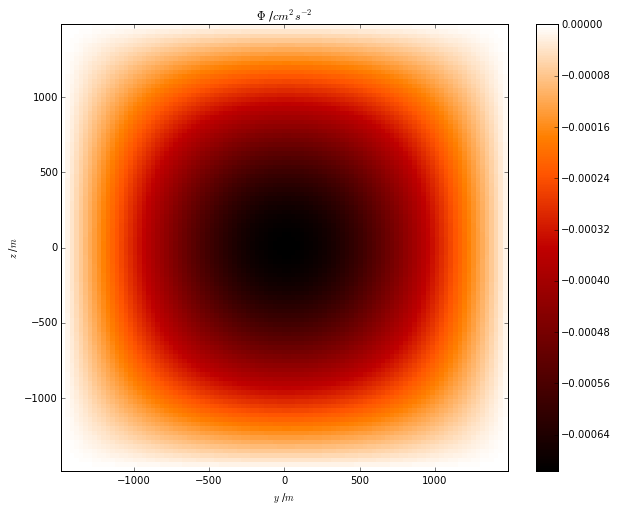

In [166]:
fig_1 = plt.figure('Potencial Gravitacional', figsize=(10,8))
ax_11 = fig_1.add_subplot(111)
fig_1.colorbar(ax_11.pcolor(y_tick, z_tick, phi[int(N/2)], cmap='gist_heat'))
ax_11.clabel(ax_11.contour(y_tick, z_tick, phi[int(N/2)], levels=[-1,-2,-4,-8,-16],colors = 'k'))
ax_11.set_title('$\Phi$ /$cm^{2}s^{-2}$')
ax_11.set_xlabel('$y$ /$m$')
ax_11.set_ylabel('$z$ /$m$')
plt.show()

In [134]:
x_t = np.linspace(-1, 1, 3)
y_t = np.linspace(-6, 6, 5)
z_t = np.linspace(-66, 66, 7)
print x_t
print y_t
print z_t
ym, xm, zm = np.meshgrid(y_t, x_t, z_t)

print
print 'dens1'

dens1 = np.zeros((3, 5, 7))
dens1[xm > 0 ] = 1

print dens1

print
print 'dens2'

dens2 = np.zeros((3, 5, 7))
dens2[ym > 3] = 1

print dens2

print
print 'dens3'

dens3 = np.zeros((3, 5, 7))
dens3[zm > 15] = 1

print dens3

print
print 'dens4'

dens4 = np.zeros((3, 5, 7))
dens4[abs(ym) <= 3] = 1
dens4[abs(zm) < 22] = 1

print dens4

[-1.  0.  1.]
[-6. -3.  0.  3.  6.]
[-66. -44. -22.   0.  22.  44.  66.]

dens1
[[[ 0.  0.  0.  0.  0.  0.  0.]
  [ 0.  0.  0.  0.  0.  0.  0.]
  [ 0.  0.  0.  0.  0.  0.  0.]
  [ 0.  0.  0.  0.  0.  0.  0.]
  [ 0.  0.  0.  0.  0.  0.  0.]]

 [[ 0.  0.  0.  0.  0.  0.  0.]
  [ 0.  0.  0.  0.  0.  0.  0.]
  [ 0.  0.  0.  0.  0.  0.  0.]
  [ 0.  0.  0.  0.  0.  0.  0.]
  [ 0.  0.  0.  0.  0.  0.  0.]]

 [[ 1.  1.  1.  1.  1.  1.  1.]
  [ 1.  1.  1.  1.  1.  1.  1.]
  [ 1.  1.  1.  1.  1.  1.  1.]
  [ 1.  1.  1.  1.  1.  1.  1.]
  [ 1.  1.  1.  1.  1.  1.  1.]]]

dens2
[[[ 0.  0.  0.  0.  0.  0.  0.]
  [ 0.  0.  0.  0.  0.  0.  0.]
  [ 0.  0.  0.  0.  0.  0.  0.]
  [ 0.  0.  0.  0.  0.  0.  0.]
  [ 1.  1.  1.  1.  1.  1.  1.]]

 [[ 0.  0.  0.  0.  0.  0.  0.]
  [ 0.  0.  0.  0.  0.  0.  0.]
  [ 0.  0.  0.  0.  0.  0.  0.]
  [ 0.  0.  0.  0.  0.  0.  0.]
  [ 1.  1.  1.  1.  1.  1.  1.]]

 [[ 0.  0.  0.  0.  0.  0.  0.]
  [ 0.  0.  0.  0.  0.  0.  0.]
  [ 0.  0.  0.  0.  0.  0.  0.]
  [ 0. 